In [87]:

import pandas as pd

df = pd.read_csv('Data/rio_sp_1955_1966.csv')
df

,Comp,Temp,Data,Casa,GC,GF,Fora,Res,PC,PF,J
0,Rio-SP,1963,1963-02-13,São Paulo,2,1,Palmeiras,VC,3,0,1
1,Rio-SP,1963,1963-02-13,Vasco,1,1,Fluminense,E,1,1,2
2,Rio-SP,1963,1963-02-14,Corinthians,3,1,Portuguesa,VC,3,0,3
3,Rio-SP,1963,1963-02-14,Flamengo,4,1,Olaria,VC,3,0,4
4,Rio-SP,1963,1963-02-16,Palmeiras,1,1,Botafogo,E,1,1,5
...,...,...,...,...,...,...,...,...,...,...,...
203,Rio-SP,1966,1966-03-26,São Paulo,4,2,Palmeiras,VC,3,0,41
204,Rio-SP,1966,1966-03-27,Bangu,2,0,Fluminense,VC,3,0,44
205,Rio-SP,1966,1966-03-27,Botafogo,3,0,Vasco,VC,3,0,42
206,Rio-SP,1966,1966-03-27,Santos,0,0,Corinthians,E,1,1,43


In [73]:
unique_values = df['Fora'].unique()
unique_values_as_strings = [str(value) for value in unique_values]
unique_values_sorted = sorted(unique_values_as_strings)
print(unique_values_sorted)

['Ahtletico-PR', 'America-RJ', 'Athletico-PR', 'Atlético-MG', 'Bahia', 'Bangu', 'Botafogo', 'Corinthians', 'Coritiba', 'Cruzeiro', 'Ferroviário-CE', 'Flamengo', 'Fluminense', 'Grêmio', 'Internacional', 'Náutico', 'Palmeiras', 'Ponte Preta', 'Portuguesa', 'Santa Cruz', 'Santos', 'São Paulo', 'Vasco']


In [74]:


df.replace({ 'Ahtletico-PR': 'Athletico-PR'
            
            }, inplace=True)

df

,Unnamed: 0,Comp,Temp,Data,Casa,GC,GF,Fora,Res,PC,PF,J
0,0,Robertão,1967,1967-03-05,Fluminense,2,4,Palmeiras,VV,0,3,1
1,1,Robertão,1967,1967-03-05,Cruzeiro,4,0,Atlético-MG,VC,3,0,2
2,2,Robertão,1967,1967-03-05,Portuguesa,1,2,Flamengo,VV,0,3,3
3,3,Robertão,1967,1967-03-05,Ferroviário-CE,1,1,Bangu,E,1,1,4
4,4,Robertão,1967,1967-03-05,Internacional,2,0,Grêmio,VC,3,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...
538,135,Robertão,1970,1970-12-06,Athletico-PR,1,1,Fluminense,E,1,1,136
539,136,Robertão,1970,1970-12-13,Fluminense,1,0,Palmeiras,VC,3,0,137
540,137,Robertão,1970,1970-12-13,Cruzeiro,1,1,Atlético-MG,E,1,1,138
541,138,Robertão,1970,1970-12-16,Cruzeiro,0,1,Fluminense,VV,0,3,139


In [76]:
df.drop('Unnamed: 0', axis=1, inplace=True)
df.to_csv('Data/robertao')


In [77]:
import pandas as pd

def update_team_stats(df):
    team_stats = {}

    for index, row in df.iterrows():
        home_team, away_team = row['Casa'], row['Fora']
        result = row['Res']

        # Update home team stats
        team_stats.setdefault(home_team, {'Jogos': 0, 'Vitórias': 0, 'Derrotas': 0, 'Empates': 0, 'Gols': 0, 'Pontos': 0})
        team_stats[home_team]['Jogos'] += 1
        team_stats[home_team]['Gols'] += row['GC']

        if result == 'VC':
            team_stats[home_team]['Vitórias'] += 1
            team_stats[home_team]['Pontos'] += 2
        elif result == 'VV':
            team_stats[home_team]['Derrotas'] += 1
        else:
            team_stats[home_team]['Empates'] += 1
            team_stats[home_team]['Pontos'] += 1

        # Update away team stats
        team_stats.setdefault(away_team, {'Jogos': 0, 'Vitórias': 0, 'Derrotas': 0, 'Empates': 0, 'Gols': 0, 'Pontos': 0})
        team_stats[away_team]['Jogos'] += 1
        team_stats[away_team]['Gols'] += row['GF']

        if result == 'VC':
            team_stats[away_team]['Derrotas'] += 1
        elif result == 'VV':
            team_stats[away_team]['Vitórias'] += 1
            team_stats[away_team]['Pontos'] += 2
        else:
            team_stats[away_team]['Empates'] += 1
            team_stats[away_team]['Pontos'] += 1

    # Create a DataFrame with team statistics
    team_stats_df = pd.DataFrame.from_dict(team_stats, orient='index').reset_index()
    team_stats_df = team_stats_df.rename(columns={'index': 'Time', 'Jogos': 'Partidas', 'Vitórias': 'Vitórias', 'Derrotas': 'Derrotas',
                                                  'Empates': 'Empates', 'Gols': 'Gols Marcados', 'Pontos': 'Pontuação'})

    # Calculating the percentage of victories, draws, and losses
    team_stats_df['Percentual Vitórias'] = (team_stats_df['Vitórias'] / team_stats_df['Partidas']) * 100
    team_stats_df['Percentual Empates'] = (team_stats_df['Empates'] / team_stats_df['Partidas']) * 100
    team_stats_df['Percentual Derrotas'] = (team_stats_df['Derrotas'] / team_stats_df['Partidas']) * 100

    # Calculating the percentage of total points based on the maximum possible points
    max_possible_points = team_stats_df['Partidas'] * 2
    team_stats_df['Aproveitamento'] = (team_stats_df['Pontuação'] / max_possible_points) * 100
    team_stats_df = team_stats_df.sort_values(by='Aproveitamento', ascending=False)

    return team_stats_df

# Example usage:
team_stats_df = update_team_stats(df)
print(team_stats_df)
team_stats_df.to_csv('Data/estatisticas_robertao.csv')
team_stats_df.to_excel('Data/estatisticas_robertao.csv')


              Time  Partidas  Vitórias  Derrotas  Empates  Gols Marcados  \
1        Palmeiras        77        41        14       22            117   
12     Corinthians        71        37        18       16            105   
8    Internacional        71        31        17       23             95   
2         Cruzeiro        67        31        19       17            105   
11          Santos        66        28        18       20            114   
3      Atlético-MG        64        27        20       17             89   
9           Grêmio        68        23        18       27             74   
0       Fluminense        64        25        26       13             88   
7            Bangu        30         8        10       12             28   
4       Portuguesa        46        12        16       18             61   
13        Botafogo        66        20        26       20             73   
16    Athletico-PR        32        10        13        9             40   
5         Fl

ValueError: No engine for filetype: 'csv'

In [78]:
team_stats_df.head(30)

,Time,Partidas,Vitórias,Derrotas,Empates,Gols Marcados,Pontuação,Percentual Vitórias,Percentual Empates,Percentual Derrotas,Aproveitamento
1,Palmeiras,77,41,14,22,117,104,53.246753,28.571429,18.181818,67.532468
12,Corinthians,71,37,18,16,105,90,52.112676,22.535211,25.352113,63.380282
8,Internacional,71,31,17,23,95,85,43.661972,32.394366,23.943662,59.859155
2,Cruzeiro,67,31,19,17,105,79,46.268657,25.373134,28.358209,58.955224
11,Santos,66,28,18,20,114,76,42.424242,30.303030,27.272727,57.575758
3,Atlético-MG,64,27,20,17,89,71,42.187500,26.562500,31.250000,55.468750
9,Grêmio,68,23,18,27,74,73,33.823529,39.705882,26.470588,53.676471
0,Fluminense,64,25,26,13,88,63,39.062500,20.312500,40.625000,49.218750
7,Bangu,30,8,10,12,28,28,26.666667,40.000000,33.333333,46.666667
4,Portuguesa,46,12,16,18,61,42,26.086957,39.130435,34.782609,45.652174


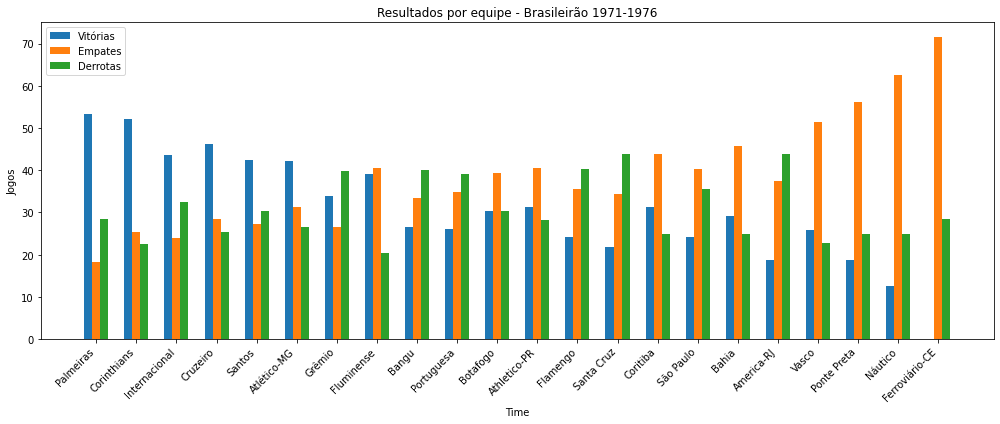

In [80]:
import matplotlib.pyplot as plt

# Assuming team_stats_df is your DataFrame with team statistics
teams = team_stats_df['Time']
victories = team_stats_df['Percentual Vitórias']
draws = team_stats_df['Percentual Derrotas']
losses = team_stats_df['Percentual Empates']

# Plotting a bar chart
fig, ax = plt.subplots(figsize=(14, 6))

bar_width = 0.2
index = range(len(teams))

bar1 = ax.bar(index, victories, bar_width, label='Vitórias')
bar2 = ax.bar([i + bar_width for i in index], draws, bar_width, label='Empates')
bar3 = ax.bar([i + 2 * bar_width for i in index], losses, bar_width, label='Derrotas')

# Adding labels, title, and legend
ax.set_xlabel('Time')
ax.set_ylabel('Jogos')
ax.set_title('Resultados por equipe - Brasileirão 1971-1976')
ax.set_xticks([i + bar_width for i in index])
ax.set_xticklabels(teams, rotation=45, ha='right')
ax.legend()

# Display the plot
plt.tight_layout()

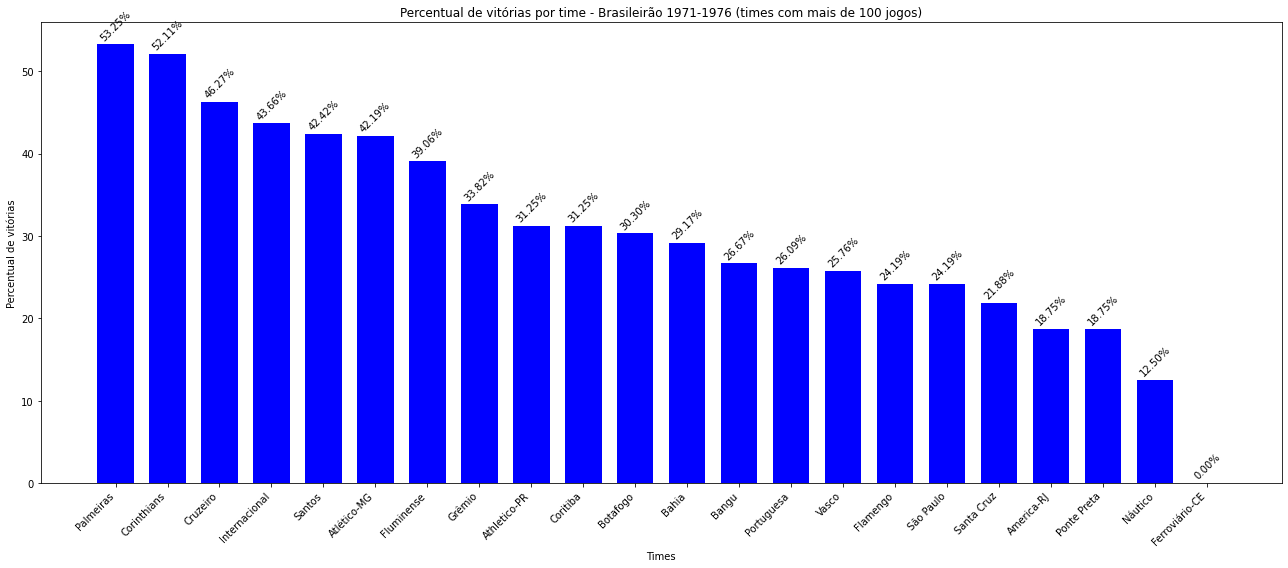

In [84]:
import matplotlib.pyplot as plt

# Assuming team_stats_df is your DataFrame with team statistics
teams = team_stats_df['Time']
victory_percentage = team_stats_df['Percentual Vitórias']

# Sort teams by the percentage of victories
sorted_indices = victory_percentage.argsort()[::-1]
sorted_teams = teams.iloc[sorted_indices]
sorted_percentages = victory_percentage.iloc[sorted_indices]

# Plotting a bar chart
fig, ax = plt.subplots(figsize=(18, 8))  # Increase figsize for more spacing

bar_width = 0.7  # Increase bar_width for more spacing
index = range(len(sorted_teams))

# Change the color to blue
bars = ax.bar(index, sorted_percentages, bar_width, color='blue')

# Adding labels, title, and legend
ax.set_xlabel('Times')
ax.set_ylabel('Percentual de vitórias')
ax.set_title('Percentual de vitórias por time - Brasileirão 1971-1976 (times com mais de 100 jogos)')
ax.set_xticks(index)
ax.set_xticklabels(sorted_teams, rotation=45, ha='right')

# Display the percentages on top of the bars with rotation
for bar, percentage in zip(bars, sorted_percentages):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height + 0.5, f'{percentage:.2f}%', ha='center', rotation=45)

# Display the plot
plt.tight_layout()
plt.show()
